In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(os.curdir+'/data/covid_19_india.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
#plt.rcParams['figure.figsize']=17,8
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
import folium 
from folium import plugins
plt.rcParams['figure.figsize'] = 10, 12
import warnings
warnings.filterwarnings('ignore')

In [3]:
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [4]:
df= pd.read_csv(os.curdir+"/data/covid_19_india.csv")
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [5]:
df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [6]:
df.drop(['ConfirmedIndianNational','ConfirmedForeignNational'],axis=1,inplace=True)

In [7]:
df.shape

(14402, 7)

In [8]:
df.head()

,Sno,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,0,0,3


# Let's See WHats the race between Recovered and Deaths

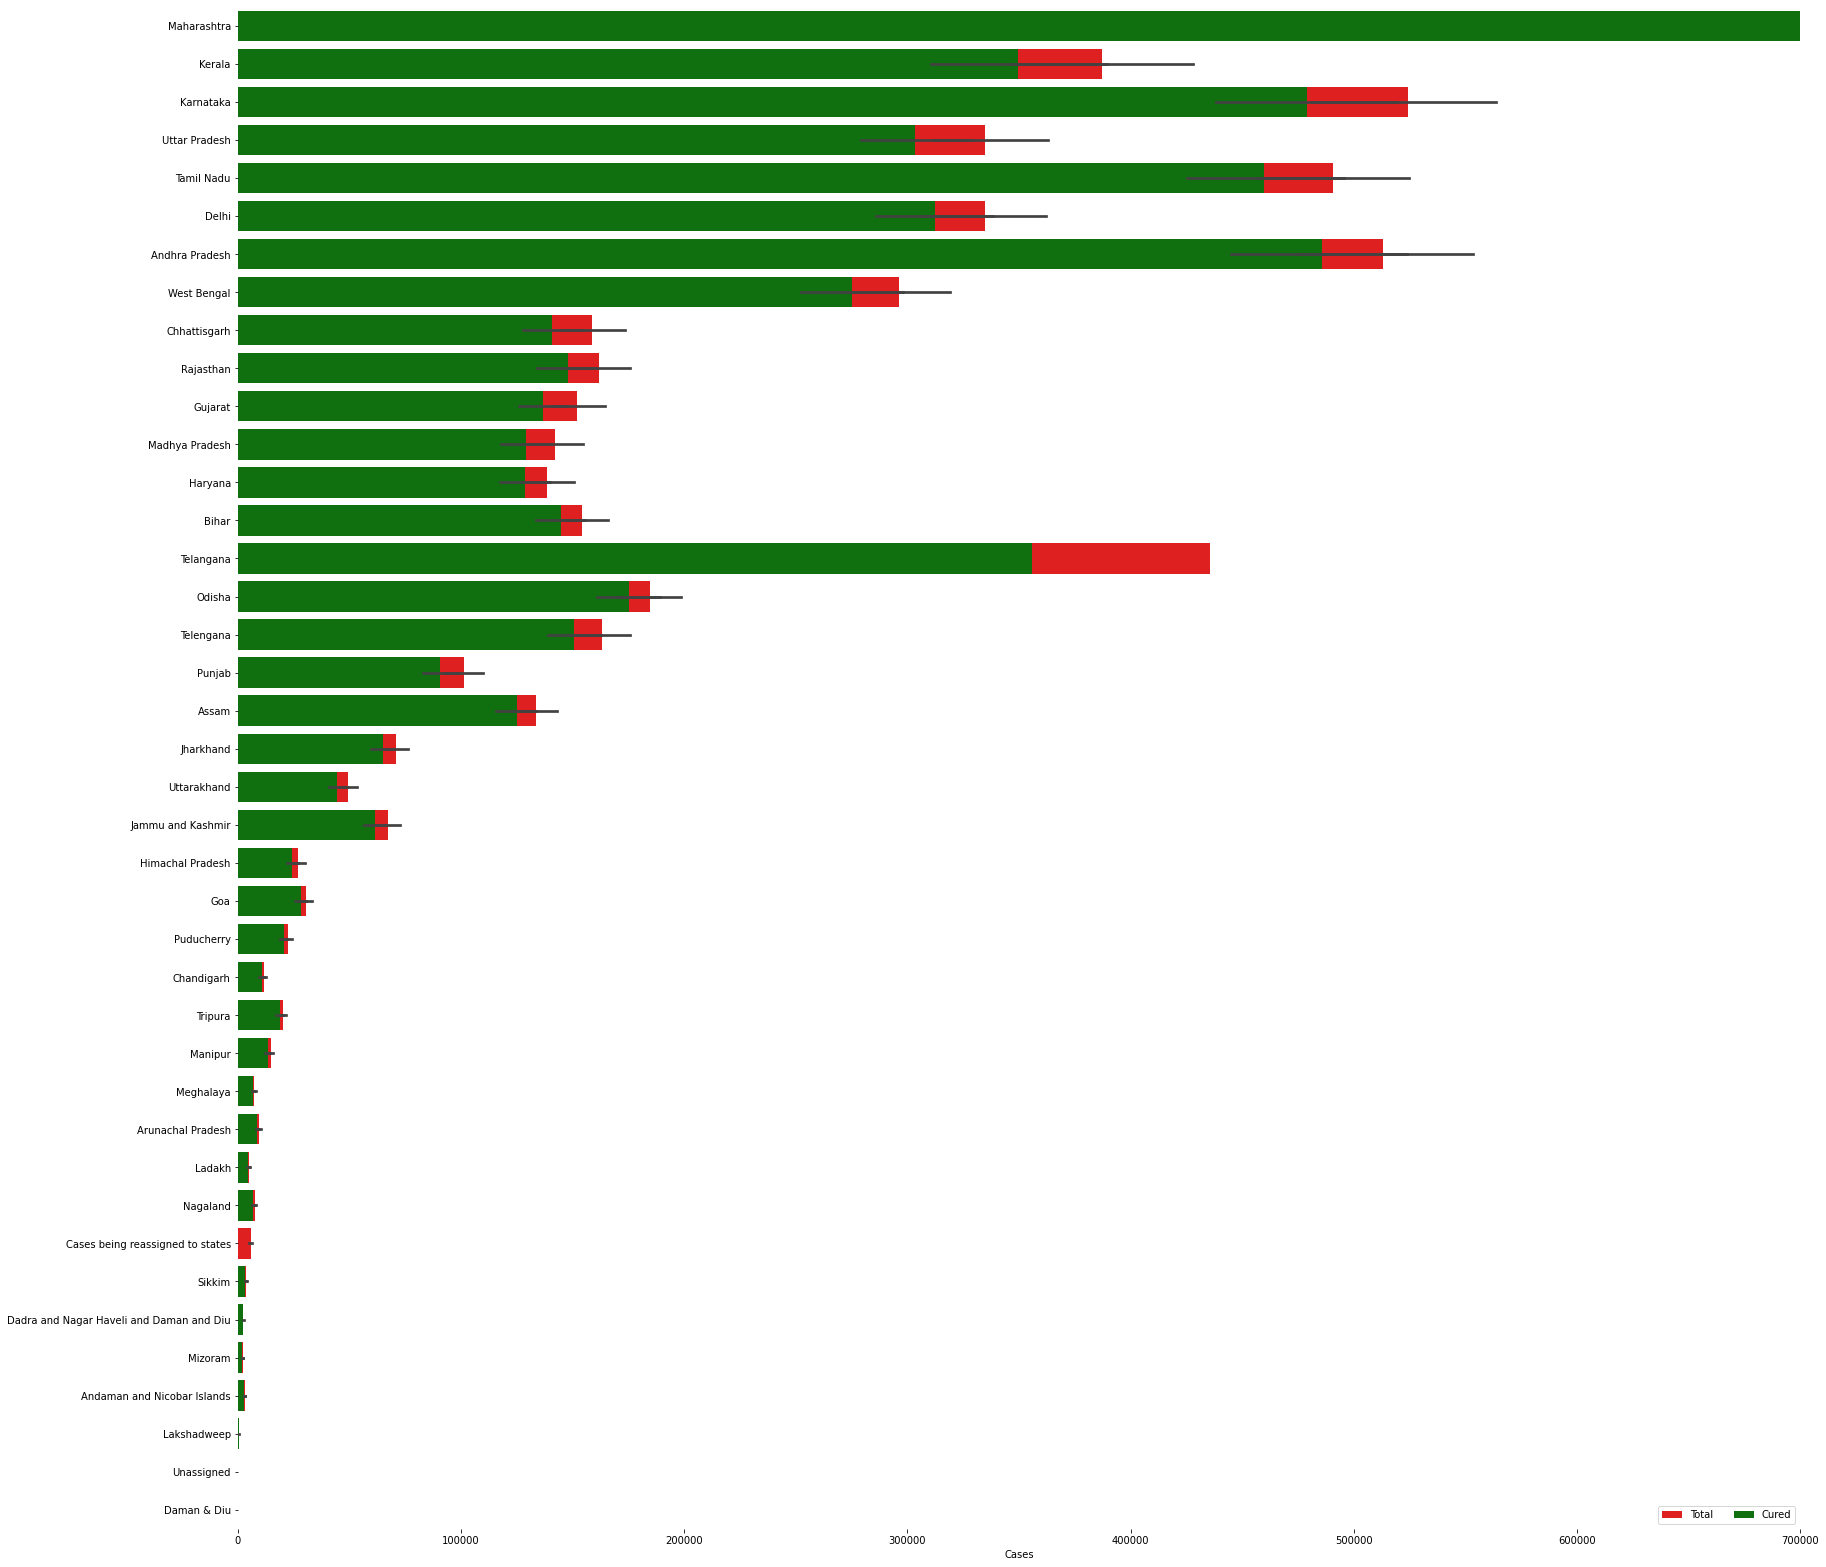

In [9]:
f, ax = plt.subplots(figsize=(28, 28))
data = df[['State/UnionTerritory','Confirmed','Cured','Deaths']]   
data.sort_values('Confirmed',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Confirmed", y="State/UnionTerritory", data=data,label="Total", color="red")
sns.set_color_codes("muted")
sns.barplot(x="Cured", y="State/UnionTerritory", data=data, label="Cured", color="green")
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 700000), ylabel="",xlabel="Cases")
sns.despine(left=True, bottom=True)

In [10]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst = True)

## Check The Confirmed, Recovered and Death Trolls in India 

In [11]:
df_confirmed_india=df.groupby('Date')['Confirmed'].sum().reset_index()
df_cured_india=df.groupby('Date')['Cured'].sum().reset_index()
df_death_india=df.groupby('Date')['Deaths'].sum().reset_index()

In [12]:
print("The Confirmed Cases are",df_confirmed_india.Confirmed.max())
print("The Recovered Cases are",df_cured_india.Cured.max())
print("The Deaths Cases are",df_death_india.Deaths.max())

The Confirmed Cases are 18762976
The Recovered Cases are 15384418
The Deaths Cases are 208330


## Let's See the Day-wise cases on India

> ## Confirmed Day wise Cases

In [13]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_confirmed_india['Date'], y = df_confirmed_india['Confirmed'], mode='lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in India (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()
# New COVID-19 cases reported daily in India
import plotly.express as px
fig = px.bar(df_confirmed_india, x="Date", y="Confirmed", barmode='group', height=400)
fig.update_layout(title_text='Coronavirus Cases in India on daily basis',plot_bgcolor='gold')
fig.show()

## Deaths Day-Wise 

In [14]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_death_india['Date'], y = df_death_india['Deaths'], mode='lines+markers',name='Total Deaths',line=dict(color='Red', width=2)))
fig.update_layout(title_text='Trend of Death Cases in India',plot_bgcolor='rgb(230, 230, 230)')
fig.show()
# New COVID-19 cases reported daily in India
import plotly.express as px
fig = px.bar(df_death_india, x="Date", y="Deaths", barmode='group', height=500)
fig.update_layout(title_text='Coronavirus Deaths in India on daily basis',plot_bgcolor='lime')
fig.show()

## Let's Do in One graph to see te day-Wise Confirmed, Deaths and Cured cases

In [15]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_confirmed_india['Date'], y=df_confirmed_india['Confirmed'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=df_death_india['Date'], y=df_death_india['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=df_cured_india['Date'], y=df_cured_india['Cured'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
fig.update_layout(title='India COVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))
fig.show()

# Let's Now Analyze State-Wise Cases and Recovery

In [16]:
import numpy as np
state_cases = df.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max().reset_index()
state_cases['Active'] = state_cases['Confirmed'] - (state_cases['Deaths']+ state_cases['Cured'])
state_cases["Death Rate (per 100)"] = np.round(100*state_cases["Deaths"]/state_cases["Confirmed"],2)
state_cases["Cure Rate (per 100)"] = np.round(100*state_cases["Cured"]/state_cases["Confirmed"],2)

In [17]:
state_cases.head()

,State/UnionTerritory,Confirmed,Deaths,Cured,Active,Death Rate (per 100),Cure Rate (per 100)
0,Andaman and Nicobar Islands,5875,67,5643,165,1.14,96.05
1,Andhra Pradesh,1084336,7928,962250,114158,0.73,88.74
2,Arunachal Pradesh,18256,59,17085,1112,0.32,93.59
3,Assam,249926,1281,224194,24451,0.51,89.70
4,Bihar,454464,2480,351162,100822,0.55,77.27


In [18]:
state_cases['State/UnionTerritory'].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar',
       'Cases being reassigned to states', 'Chandigarh', 'Chhattisgarh',
       'Dadra and Nagar Haveli and Daman and Diu', 'Daman & Diu', 'Delhi',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
       'Telengana', 'Tripura', 'Unassigned', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'], dtype=object)

In [19]:
state_cases['State/UnionTerritory'].nunique()

40

### Here we have got that we have the data if around 40 States and Union Territories

## Now let's Analyze the Confirmed,Recovered and Deaths on Each State

In [20]:
state_wise_cases=state_cases.sort_values('Confirmed', ascending= False).fillna(0).style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Cured"])\
                        .background_gradient(cmap='Oranges',subset=["Active"])\
                        .background_gradient(cmap='RdYlBu',subset=["Death Rate (per 100)"])\
                        .background_gradient(cmap='Accent',subset=["Cure Rate (per 100)"])

In [21]:
state_wise_cases

,State/UnionTerritory,Confirmed,Deaths,Cured,Active,Death Rate (per 100),Cure Rate (per 100)
22,Maharashtra,4539553,67985,3799266,672302,1.500000,83.690000
18,Kerala,1533984,5259,1244301,284424,0.340000,81.120000
17,Karnataka,1474846,15306,1110025,349515,1.040000,75.260000
37,Uttar Pradesh,1217952,12238,896477,309237,1.000000,73.610000
32,Tamil Nadu,1148064,13933,1021575,112556,1.210000,88.980000
10,Delhi,1122286,15772,1008537,97977,1.410000,89.860000
1,Andhra Pradesh,1084336,7928,962250,114158,0.730000,88.740000
39,West Bengal,810955,11248,689466,110241,1.390000,85.020000
7,Chhattisgarh,713706,8312,587484,117910,1.160000,82.310000
30,Rajasthan,580846,4084,407243,169519,0.700000,70.110000


Here we can see that Maharastra is at the top of confirmed cases,

# In the Next cell we'll see this in a better visualization 
# Which states are more affected by the virus?

In [22]:
px.treemap(state_cases,path=["State/UnionTerritory"],values="Deaths",title="Overall States Comparision of deaths")

# Let's Check the Fatality Ratio

In [23]:
df['Fatality-Ratio'] = df['Deaths']/df['Confirmed']

In [24]:
df['Fatality-Ratio']

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
14397    0.005190
14398    0.011260
14399    0.014308
14400    0.010048
14401    0.013870
Name: Fatality-Ratio, Length: 14402, dtype: float64

### FATALITY_RATIO AMONG STATES

In [25]:
fatality_ratio=df.groupby('State/UnionTerritory')['Fatality-Ratio'].sum().reset_index()
fatality_ratio.iplot(kind='line',mode='lines+markers',x='State/UnionTerritory',y='Fatality-Ratio',title='Fatality-Ratio Among States',color='blue')

### FATALITY RATIO IN AN YEAR

In [26]:
fatality_year=df.groupby('Date')['Fatality-Ratio'].sum().reset_index()
fatality_year.iplot(kind='line',x='Date',y='Fatality-Ratio')

### Top 10 States With Highest Confirmed Cases

In [27]:
# Top 10 states with maximum number of COnfirmed Cases
top_10=state_cases.groupby('State/UnionTerritory')['Confirmed'].sum().sort_values(ascending=False).reset_index()
trace = go.Table(
    domain=dict(x=[0, 0.52],
                y=[0, 1.0]),
    header=dict(values=["State/UnionTerritory","Confirmed Cases"],
                fill = dict(color = '#119DFF'),
                font = dict(color = 'white', size = 14),
                align = ['center'],
               height = 30),
    cells=dict(values=[top_10['State/UnionTerritory'].head(10),top_10['Confirmed'].head(10)],
               fill = dict(color = ['#25FEFD', 'white']),
               align = ['center'],height=20))

trace1 = go.Bar(x=top_10['State/UnionTerritory'].head(10),
                y=top_10['Confirmed'].head(10),
                xaxis='x1',
                yaxis='y1',
                marker=dict(color='blue'),opacity=0.60)
layout = dict(
    width=1000,
    height=400,
    autosize=False,
    title='Top-10 States with Highest No. of Cases',
    showlegend=False,   
    xaxis1=dict(**dict(domain=[0.58, 1], anchor='y1', showticklabels=True)),
    yaxis1=dict(**dict(domain=[0, 1.0], anchor='x1', hoverformat='.2f')),  
)
fig1 = dict(data=[trace, trace1], layout=layout)
iplot(fig1)

### Top 10 States in Highest Recovery

In [28]:
# Top 10 states with maximum number of Recovery
top_10=state_cases.groupby('State/UnionTerritory')['Cured'].sum().sort_values(ascending=False).reset_index()
trace = go.Table(
    domain=dict(x=[0, 0.52],
                y=[0, 1.0]),
    header=dict(values=["State/UnionTerritory","Cured Cases"],
                fill = dict(color = '#119DFF'),
                font = dict(color = 'white', size = 14),
                align = ['center'],
               height = 30),
    cells=dict(values=[top_10['State/UnionTerritory'].head(10),top_10['Cured'].head(10)],
               fill = dict(color = ['lime', 'white']),
               align = ['center'],height=20))

trace1 = go.Bar(x=top_10['State/UnionTerritory'].head(10),
                y=top_10['Cured'].head(10),
                xaxis='x1',
                yaxis='y1',
                marker=dict(color='lime'),opacity=0.60)
layout = dict(
    width=1000,
    height=400,
    autosize=False,
    title='Top-10 States with Highest Recovery',
    showlegend=False,   
    xaxis1=dict(**dict(domain=[0.58, 1], anchor='y1', showticklabels=True)),
    yaxis1=dict(**dict(domain=[0, 1.0], anchor='x1', hoverformat='.2f')),  
)
fig1 = dict(data=[trace, trace1], layout=layout)
iplot(fig1)

### Top 10 States with highest number of Deaths

In [29]:
# Top 10 states with maximum number of Deaths
top_10=state_cases.groupby('State/UnionTerritory')['Deaths'].sum().sort_values(ascending=False).reset_index()
trace = go.Table(
    domain=dict(x=[0, 0.52],
                y=[0, 1.0]),
    header=dict(values=["State/UnionTerritory","Deaths Cases"],
                fill = dict(color = '#119DFF'),
                font = dict(color = 'white', size = 14),
                align = ['center'],
               height = 30),
    cells=dict(values=[top_10['State/UnionTerritory'].head(10),top_10['Deaths'].head(10)],
               fill = dict(color = ['salmon', 'white']),
               align = ['center'],height=20))

trace1 = go.Bar(x=top_10['State/UnionTerritory'].head(10),
                y=top_10['Deaths'].head(10),
                xaxis='x1',
                yaxis='y1',
                marker=dict(color='darkred'),opacity=0.60)
layout = dict(
    width=1000,
    height=400,
    autosize=False,
    title='Top-10 States with Highest No. of Cases',
    showlegend=False,   
    xaxis1=dict(**dict(domain=[0.58, 1], anchor='y1', showticklabels=True)),
    yaxis1=dict(**dict(domain=[0, 1.0], anchor='x1', hoverformat='.2f')),  
)
fig1 = dict(data=[trace, trace1], layout=layout)
iplot(fig1)

## Testing Details

In [33]:
df_testing=pd.read_csv(os.curdir+"/data/StatewiseTestingDetails.csv")

In [34]:
df_testing.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [35]:
# States with Total Sample collections
df_sample=df_testing.groupby('State')['TotalSamples'].sum().sort_values(ascending=False).reset_index()

In [36]:
df_sample.head()

,State,TotalSamples
0,Uttar Pradesh,5.751460e+09
1,Bihar,4.072612e+09
2,Tamil Nadu,3.521683e+09
3,Karnataka,3.395310e+09
4,Maharashtra,3.299659e+09


In [37]:
# Top 10 states with Total Sample Collections
px.bar(df_sample.head(10),x='State',y='TotalSamples')

In [38]:
df_positive=df_testing.groupby('State')['Positive'].sum().sort_values(ascending=False).reset_index()

## Positive Cases
## What is the number of positive cases rising in India?

In [39]:
df_positive.head(10).iplot(kind='bar',x='State',y='Positive')

In [43]:
df_vaccine=pd.read_csv(os.curdir+'/data/covid_vaccine_statewise.csv')

In [44]:
df_vaccine.head()

,Updated On,State,Total Individuals Registered,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,AEFI,Total Individuals Vaccinated,Total Doses Administered
0,16/01/2021,India,6943622.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,48276.0,48276
1,17/01/2021,India,7119567.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,58604.0,58604
2,18/01/2021,India,7150780.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,99449.0,99449
3,19/01/2021,India,7423057.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,195525.0,195525
4,20/01/2021,India,7555207.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,251280.0,251280


In [45]:
df_vaccine.columns

Index(['Updated On', 'State', 'Total Individuals Registered',
       'Total Sessions Conducted', 'Total Sites ', 'First Dose Administered',
       'Second Dose Administered', 'Male(Individuals Vaccinated)',
       'Female(Individuals Vaccinated)', 'Transgender(Individuals Vaccinated)',
       'Total Covaxin Administered', 'Total CoviShield Administered', 'AEFI',
       'Total Individuals Vaccinated', 'Total Doses Administered'],
      dtype='object')

In [46]:
male = df_vaccine["Male(Individuals Vaccinated)"].sum() 
female = df_vaccine["Female(Individuals Vaccinated)"].sum()  
trans = df_vaccine["Transgender(Individuals Vaccinated)"].sum()
px.pie(names=["Male Vaccinated","Female Vaccinated","Trans Gender"],values=[male,female,trans],title="Male and Female Vaccinated ratio for Covid19")

In [47]:
Covaxin = df_vaccine["Total Covaxin Administered"].sum() 
Covishield = df_vaccine["Total CoviShield Administered"].sum()  
px.pie(names=["Covaxin Vaccinated","Covishield Vaccinated"],values=[Covaxin,Covishield],title="Covaxin and Covishield Vaccination")

In [48]:
df_vaccine.head()

,Updated On,State,Total Individuals Registered,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,AEFI,Total Individuals Vaccinated,Total Doses Administered
0,16/01/2021,India,6943622.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,48276.0,48276
1,17/01/2021,India,7119567.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,58604.0,58604
2,18/01/2021,India,7150780.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,99449.0,99449
3,19/01/2021,India,7423057.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,195525.0,195525
4,20/01/2021,India,7555207.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,251280.0,251280


In [49]:
Doses = df_vaccine["Total Doses Administered"].sum() 
Vaccinated = df_vaccine["Total Individuals Vaccinated"].sum()  
px.pie(names=["Doses Administered","People Vaccinated"],values=[Doses,Vaccinated],title="Doses administered vs People Vaccinated")

In [50]:
df_vaccine.head()

,Updated On,State,Total Individuals Registered,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,AEFI,Total Individuals Vaccinated,Total Doses Administered
0,16/01/2021,India,6943622.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,48276.0,48276
1,17/01/2021,India,7119567.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,58604.0,58604
2,18/01/2021,India,7150780.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,99449.0,99449
3,19/01/2021,India,7423057.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,195525.0,195525
4,20/01/2021,India,7555207.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,251280.0,251280


In [51]:
df_vaccine['State'].unique()

array(['India', 'Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Updated On', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

# Let's Analyze 3 States of How many People gets Vaccinated
# Odisha, Maharastra, Delhi

In [52]:
df_Odisha=df_vaccine[df_vaccine['State']=='Odisha']
df_Maharashtra=df_vaccine[df_vaccine['State']=='Maharashtra']
df_Delhi=df_vaccine[df_vaccine['State']=='Delhi']

In [53]:
Doses = df_Odisha["Total Doses Administered"].sum() 
Vaccinated = df_Odisha["Total Individuals Vaccinated"].sum()  
px.pie(names=["Doses Administered","People Vaccinated"],values=[Doses,Vaccinated],title="Doses administered vs People Vaccinated")

In [54]:
Doses = df_Maharashtra["Total Doses Administered"].sum() 
Vaccinated = df_Maharashtra["Total Individuals Vaccinated"].sum()  
px.pie(names=["Doses Administered","People Vaccinated"],values=[Doses,Vaccinated],title="Doses administered vs People Vaccinated")

In [55]:
Doses = df_Delhi["Total Doses Administered"].sum() 
Vaccinated = df_Delhi["Total Individuals Vaccinated"].sum()  
px.pie(names=["Doses Administered","People Vaccinated"],values=[Doses,Vaccinated],title="Doses administered vs People Vaccinated")

In [56]:
df_Odisha.iplot(kind='bar',x='Updated On',y='Total Individuals Vaccinated')